Populating the interactive namespace from numpy and matplotlib


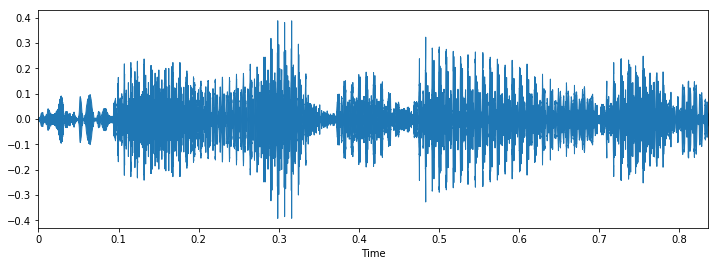

In [3]:
% pylab inline
import os
import pandas as pd
import librosa.display as ld
import librosa
import glob 

data, sampling_rate = librosa.load('file.wav')

plt.figure(figsize=(12, 4))
ld.waveplot(data, sr=sampling_rate)

In [9]:
# Feature extraction example
import numpy as np
import librosa

# Load the example clip
y, sr = librosa.load("08.wav")

# Set the hop length; at 22050 Hz, 512 samples ~= 23ms
hop_length = 512

# Separate harmonics and percussives into two waveforms
y_harmonic, y_percussive = librosa.effects.hpss(y)

# Beat track on the percussive signal
tempo, beat_frames = librosa.beat.beat_track(y=y_percussive,
                                             sr=sr)

# Compute MFCC features from the raw signal
mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length, n_mfcc=13)

# And the first-order differences (delta features)
mfcc_delta = librosa.feature.delta(mfcc)

# Stack and synchronize between beat events
# This time, we'll use the mean value (default) instead of median
beat_mfcc_delta = librosa.util.sync(np.vstack([mfcc, mfcc_delta]),
                                    beat_frames)

# Compute chroma features from the harmonic signal
chromagram = librosa.feature.chroma_cqt(y=y_harmonic,
                                        sr=sr)

# Aggregate chroma features between beat events
# We'll use the median value of each feature between beat frames
beat_chroma = librosa.util.sync(chromagram,
                                beat_frames,
                                aggregate=np.median)

# Finally, stack all beat-synchronous features together
beat_features = np.vstack([beat_chroma, beat_mfcc_delta])

In [33]:
import matplotlib.pyplot as plt
beat_features.shape
import IPython.display as ipd
ipd.Audio(beat_features)

TypeError: '<=' not supported between instances of 'NoneType' and 'int'

In [55]:
a = (44100,beat_features[1])

In [64]:
import scipy.io.wavfile as siw


In [67]:
a = siw.read('08.wav')

C:\Anaconda3\envs\tensorflow\lib\site-packages\scipy\io\wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [86]:
ipd.Audio(beat_features[10],rate=44100,autoplay=True)

In [51]:
len(a[1])/44100

17.177256235827663

TypeError: '<=' not supported between instances of 'NoneType' and 'int'

In [89]:
# Beat tracking example
from __future__ import print_function
import librosa

# 1. Get the file path to the included audio example
filename = "08.wav"

# 2. Load the audio as a waveform `y`
#    Store the sampling rate as `sr`
y, sr = librosa.load(filename)

# 3. Run the default beat tracker
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

# 4. Convert the frame indices of beat events into timestamps
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

print('Saving output to beat_times.csv')
librosa.output.times_csv('beat_times.csv', beat_times)

Estimated tempo: 136.00 beats per minute
Saving output to beat_times.csv


In [97]:
import numpy as np
framerate = 44100
t = np.linspace(0,5,framerate*5)
data = np.sin(2*np.pi*220*t) + np.sin(2*np.pi*224*t)

dataleft = np.sin(2*np.pi*120*t)
dataright = np.sin(2*np.pi*224*t)
ipd.Audio([dataleft, dataright],rate=framerate)

In [98]:
import tensorflow as tf

C:\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


TypeError: float() argument must be a string or a number, not 'tuple'

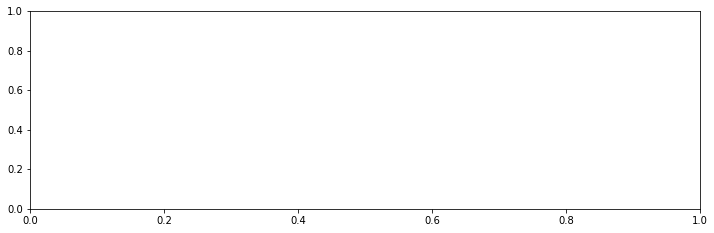

In [128]:
b = a[1].T
rp = np.max(np.abs(b))

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.fft_frequencies(a), y_axis='log')
plt.colorbar()
plt.title('Full spectrogram')


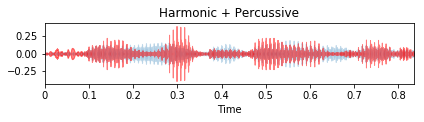

In [138]:
y, sr = librosa.load("file.wav")
y_harm, y_perc = librosa.effects.hpss(y)
plt.subplot(3, 1, 3)
librosa.display.waveplot(y_harm, sr=sr, alpha=0.25)
librosa.display.waveplot(y_perc, sr=sr, color='r', alpha=0.5)
plt.title('Harmonic + Percussive')
plt.tight_layout()


C:\Anaconda3\envs\tensorflow\lib\site-packages\librosa\core\spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


Text(0.5,1,'Linear-frequency power spectrogram')

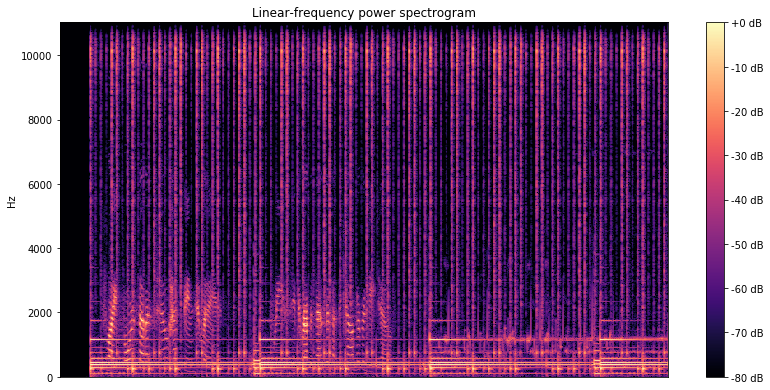

In [137]:
import matplotlib.pyplot as plt
y, sr = librosa.load("08.wav")
plt.figure(figsize=(30, 30))
D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
plt.subplot(4, 2, 1)

librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')